Task 1
X: 7.14, T:  794.0 P:  100000
X: 7.14, T:  774.0 P:  150000
X: 7.14, T:  761.0 P:  200000
X: 7.14, T:  751.5 P:  250000
X: 7.14, T:  744.0 P:  300000
X: 7.14, T:  738.5 P:  350000
X: 7.14, T:  734.0 P:  400000
X: 7.14, T:  730.0 P:  450000
X: 7.14, T:  726.5 P:  500000
X: 7.14, T:  723.5 P:  550000
X: 7.14, T:  721.0 P:  600000
X: 7.14, T:  718.5 P:  650000
X: 7.14, T:  716.5 P:  700000
X: 7.14, T:  714.5 P:  750000
X: 7.14, T:  713.0 P:  800000
X: 7.14, T:  711.0 P:  850000
X: 7.14, T:  709.5 P:  900000
X: 7.14, T:  708.5 P:  950000
X: 7.14, T:  707.0 P:  1000000
X: 7.14, T:  706.0 P:  1050000
X: 7.14, T:  704.5 P:  1100000
X: 7.14, T:  703.5 P:  1150000
X: 7.14, T:  702.5 P:  1200000
X: 7.14, T:  701.5 P:  1250000
X: 7.14, T:  700.5 P:  1300000
X: 7.14, T:  699.5 P:  1350000
X: 7.14, T:  698.5 P:  1400000
X: 7.14, T:  698.0 P:  1450000
X: 7.14, T:  697.0 P:  1500000
X: 7.14, T:  696.5 P:  1550000
X: 7.14, T:  695.5 P:  1600000
X: 7.14, T:  695.0 P:  1650000
X: 7.14, T:  694.0 

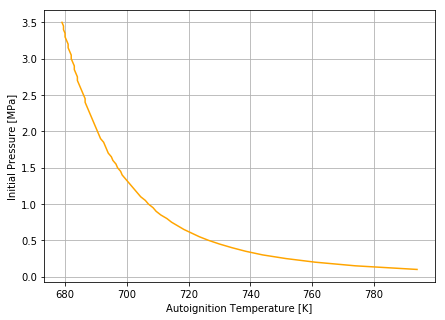

-----------------
Task 2
X:  0.2 T:  736 P:  101325
X:  0.5 T:  736 P:  101325
X:  0.8 T:  738 P:  101325
X:  1.1 T:  741 P:  101325
X:  1.4 T:  743 P:  101325
X:  1.7 T:  746 P:  101325
X:  2.0 T:  749 P:  101325
X:  2.3 T:  752 P:  101325
X:  2.6 T:  755 P:  101325
X:  2.9 T:  757 P:  101325
X:  3.2 T:  760 P:  101325
X:  3.5 T:  763 P:  101325
X:  3.8 T:  766 P:  101325
X:  4.1 T:  769 P:  101325
X:  4.4 T:  771 P:  101325
X:  4.7 T:  774 P:  101325
X:  5.0 T:  777 P:  101325
X:  5.3 T:  779 P:  101325
X:  5.6 T:  782 P:  101325
X:  5.9 T:  784 P:  101325
X:  6.2 T:  787 P:  101325
X:  6.5 T:  789 P:  101325
X:  6.8 T:  791 P:  101325
X:  7.1 T:  793 P:  101325
X:  7.4 T:  795 P:  101325
X:  7.7 T:  797 P:  101325
X:  8.0 T:  799 P:  101325


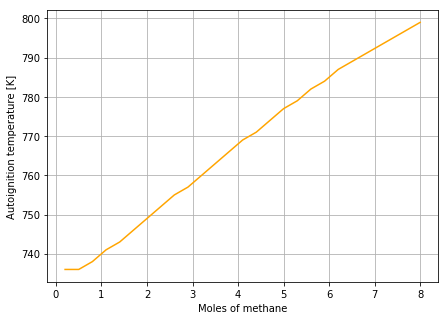

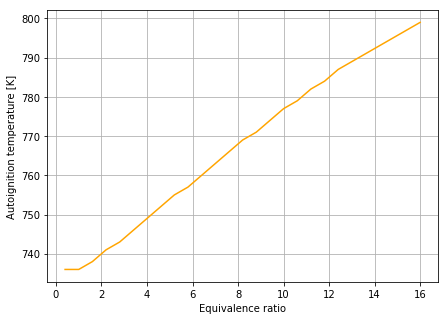

In [39]:
#importing necessary libraries
import numpy as np 
from cantera import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#selecting reaction mechanisms
gas = Solution('gri30.xml')

#setting minimal, maximal temperature and two step sizes
Tmin=500
Tmax=1500
temp_step=0.5
temp_step_coarse=50

#setting minimal, maximal pressure and a step size
Pmin=100000
Pmax=3500000
P_step=50000

#setting time step size
time_step=600



#calculating number of temperature loop iterations for different levels of precision
temp_steps_coarse_no=int(((Tmax-Tmin) // temp_step_coarse)+1)
temp_steps_no=int((temp_step_coarse// temp_step)+1)

#calculating number of pressure loop iterations
P_steps_no=((Pmax-Pmin)//P_step)+1

#creating storage arrays
autoign_temp = []
autoign_P=[]
autoign_temp_X=[]
autoign_X=[]
autoign_X_fr=[]
autoign_X_FAR=[]

#initializing stoichiometric fuel-to-air ratio
FARst=0.5/4.76

#TASK1 - AIT as a function of initial pressure
print ("Task 1")
#setting initial pressure for the pressure loop
P=Pmin

#pressure loop start
for p in range (0, P_steps_no):  
    
    #setting default state of trigger variable
    auto=0 
    
    
    #setting initial temperature for the approximate temperature loop
    T=Tmin
    
    #approximate temperature loop start
    for tc in range(0,temp_steps_coarse_no):
        #creating the gas, the reactor and the reactor network
        #for 4.76 moles of air, 7.14 moles of methane translate to 60% molar fraction
        gas.TPX = T, P, 'CH4:7.14,O2:1,N2:3.76'
        r=IdealGasReactor(gas)
        net=ReactorNet([r])
        
        #advancing simulation time 
        net.advance(time_step)
         
        #checking whether autoignition occured   
        if (r.T-T)>200:
            #setting the mixture's temperature to the lower limit of the approximate temperature window
            T-=temp_step_coarse
            
            #precise temperature loop start 
            for t in range(0,temp_steps_no):
                #creating the gas, the reactor and the reactor network for precise calculations
                #temperature and pressure change with iterations, mixture composition is constant
                gas.TPX = T, P, 'CH4:7.14,O2:1,N2:3.76'
                r=IdealGasReactor(gas)
                net=ReactorNet([r])
                
                #advancing simulation time 
                net.advance(time_step)
                
                #checking whether autoignition occured 
                if (r.T-T)>200:
                    #setting trigger variable value to break the outer loop 
                    auto=1
                    #storing current initial temperature and pressure in arrays
                    autoign_temp.append(T)
                    autoign_P.append(P/1000000)
                    #printing current initial conditions
                    print ("X: 7.14, T: ",'%.1f' % T, "P: ", P)
                    #breaking the precise temperature loop, AI occured
                    #higher temperatures do not need to be verified
                    break
                #raising the initial precise temperature in case autoiginition didn't occur    
                T+=temp_step 
                
        #breaking the approximate temperature loop if AI occured
        #higher temperatures do not need to be verified
        if auto==1:
            break    
        #raising the initial approximate temperature in  case autoiginition didn't occur    
        T+=temp_step_coarse
    #raising the pressure   
    P+=P_step


#storing results as x, y for clarity
x = autoign_temp
y = autoign_P
 
#setting plot size
plt.figure(figsize=(7,5))

#creating,labeling and saving the Initial Pressure vs AIT plot
plot(x, y, '-', color='orange') 
plt.grid()
xlabel("Autoignition Temperature [K]")
ylabel(r'Initial Pressure [MPa]')
savefig('1.png', bbox_inches='tight')
show()


#TASK2 - AIT as a function of equivalence ratio
print ("-----------------")
print ("Task 2")
#setting minimal, maximal number of moles of methane, step size
X_min=0.2
X_max=8
X_step=0.3

#calculating number of molar loop iterations
X_steps_no=int((X_max-X_min)//X_step+1)


#setting initial number of moles
X=X_min

#changing the precision of calculations - raising the size of temperature step
#calculating new number of steps
temp_step=1
temp_steps_no=int((temp_step_coarse// temp_step)+1)

#molar loop start
for x in range(0, X_steps_no):
    #setting default state of trigger variable
    auto = 0
    #setting initial temperature for the approximate temperature loop
    T=Tmin
    #approximate temperature loop start
    for tc in range(0,temp_steps_coarse_no):
        #creating the gas, the reactor and the reactor network for approximate calculations
        #temperature mixture composition change with iterations, pressure is constant and equal to one atmosphere
        #calculations look just like in Task 1 
        gas.TPX = T, one_atm, {'CH4':X,'O2':1,'N2':3.76}
        r=IdealGasReactor(gas)
        net=ReactorNet([r])
       
        net.advance(time_step)
        
        if (r.T-T)>200:
            
            T-=temp_step_coarse
           
            for t in range(0,temp_steps_no):
                gas.TPX = T, one_atm, {'CH4':X,'O2':1,'N2':3.76}
                r=IdealGasReactor(gas)
                net=ReactorNet([r])
                net.advance(time_step)
                if (r.T-T)>200:
                    auto=1
                    autoign_temp_X.append(T)
                    autoign_X.append(X)
                    autoign_X_FAR.append((X/4.76)/FARst)
                    print ("X: ", '%.1f' % X , "T: ", T, "P: ", '%.0f' % one_atm)
                    break
                T+=temp_step 
        if auto==1:
            break
                
        T+=temp_step_coarse
    X+=X_step
    
#creating plots
y2 = autoign_temp_X
x2 = autoign_X


plt.figure(figsize=(7,5))
plot(x2, y2, '-', color='orange')
plt.grid()
xlabel(r'Moles of methane')
ylabel("Autoignition temperature [K]")
savefig('2.png', bbox_inches='tight')
show()


y3 = autoign_temp_X
x3 = autoign_X_FAR

plt.figure(figsize=(7,5))
plot(x3, y3, '-', color='orange')
plt.grid()
xlabel(r'Equivalence ratio')
ylabel("Autoignition temperature [K]")
savefig('3.png', bbox_inches='tight')
show()

